In [20]:
import pandas as pd
import time
import os, requests
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def formula_as_file( formula, file, negate=False ):
    tfile = file
    if negate:
        tfile = 'tmp.png'
    r = requests.get( 'http://latex.codecogs.com/png.latex?\dpi{150} %s' % formula )
    f = open( tfile, 'wb' )
    f.write( r.content )
    f.close()
    if negate:
        os.system( 'convert tmp.png -channel RGB -negate -colorspace rgb %s' %file )

In [41]:
chem = pd.read_csv("../data/equation/chemistry_post_eq_filtered_id.csv", lineterminator='\n')
physics = pd.read_csv("../data/equation/physics_post_eq_filtered_id.csv", lineterminator='\n')
bio = pd.read_csv("../data/equation/biology_post_eq_filtered_id.csv", lineterminator='\n')

In [42]:
bio = bio.loc[bio.Equation.apply(type) != float]
chem = chem.loc[chem.Equation.apply(type) != float]
physics = physics.loc[physics.Equation.apply(type) != float]

In [43]:
bio = bio.loc[bio.Equation.apply(len) > 2]
chem = chem.loc[chem.Equation.apply(len) > 2]
physics = physics.loc[physics.Equation.apply(len) > 2]

In [44]:
bio = bio[~bio.Equation.str.contains("ce{")]
chem = chem[~chem.Equation.str.contains("ce{")]
physics = physics[~physics.Equation.str.contains("ce{")]

In [45]:
print(len(bio.index))
print(len(chem.index))
print(len(physics.index))

9001
90860
1064429


In [46]:
bio_lst = []
_ = bio.apply(lambda row: [bio_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
bio["FileName"] = bio_lst

In [56]:
start = time.time()
count = 0
for i, row in bio.iterrows():
    if count == 1000:
        break
    if len(row.Equation) < 64:
        filename = "../data/test_images/" + row.FileName + ".png"
        formula_as_file(row.Equation, filename)
        count += 1
end = time.time()
print((end-start)/60.0)

1.957079776128133


In [54]:
chem_lst = []
_ = chem.apply(lambda row: [chem_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
chem["FileName"] = chem_lst

In [57]:
start = time.time()
count = 0
for i, row in chem.iterrows():
    if count == 1000:
        break
    if len(row.Equation) < 64:
        filename = "../data/test_images/" + row.FileName + ".png"
        formula_as_file(row.Equation, filename)
        count += 1
end = time.time()
print((end-start)/60.0)

2.0579642097155255


In [58]:
phys_lst = []
_ = physics.apply(lambda row: [phys_lst.append(str(row.name) + "_" + str(row["Label"]) + "_" + str(row["Id"]))], axis=1)
physics["FileName"] = phys_lst


In [59]:
start = time.time()
count = 0
for i, row in physics.iterrows():
    if count == 1000:
        break
    if len(row.Equation) < 64:
        filename = "../data/test_images/" + row.FileName + ".png"
        formula_as_file(row.Equation, filename)
        count += 1
end = time.time()
print((end-start)/60.0)

2.2439993818600974


Time to get statistics!

In [84]:
image_data = pd.DataFrame(columns=["width", "height"])
for file in os.listdir("../data/test_images"):
    if file.endswith(".png"):
        img = "../data/test_images/" + file
        im = Image.open(img)
        size = list(im.size)
        if size[0] > 400:
            print(file)
        insert = pd.DataFrame([[float(size[0])] + [float(size[1])]], columns=["width", "height"])
        image_data = image_data.append(insert, ignore_index=True)

1382_physics_1019.png
592_biology_11143.png
1264_biology_16025.png
1035_biology_15372.png
763_biology_13670.png
1046_biology_15372.png
1334_biology_16248.png
562_biology_11008.png
1164_chemistry_542.png
1266_physics_930.png
470_biology_10536.png
469_biology_10536.png
134_biology_5457.png
1351_biology_16249.png
1317_biology_16208.png
1261_biology_16025.png
945_biology_15030.png
560_biology_11008.png
390_biology_9556.png
1333_biology_16248.png
11_biology_1431.png
1318_biology_16208.png
1258_biology_16025.png
1260_biology_16025.png
1316_biology_16208.png
967_biology_15065.png
1262_biology_16025.png
971_biology_15065.png
135_biology_5457.png
1594_chemistry_813.png
554_biology_10969.png
1166_chemistry_542.png
513_biology_10580.png
1350_biology_16249.png
1129_chemistry_532.png
167_physics_233.png
771_biology_13681.png
1319_biology_16208.png
1256_biology_16025.png
1049_biology_15372.png
798_biology_14055.png
561_biology_11008.png
64_biology_5364.png
1048_biology_15372.png


In [61]:
image_data.describe()

,width,height
count,3000.000000,3000.000000
mean,86.256000,25.039333
std,89.135086,11.384243
min,7.000000,8.000000
25%,26.000000,19.000000
50%,54.000000,23.000000
75%,115.000000,25.000000
max,699.000000,81.000000


We will now try cropping/padding to 128, 32

In [13]:
small = Image.open("../data/test_images/0_chemistry_2.png")
small.size

(54, 19)

In [33]:
big = Image.open("../data/test_images/235_physics_314.png")
big.size

(177, 59)

In [26]:
delta_w = 128 - small.size[0]
delta_h = 32 - small.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_small = ImageOps.expand(small, padding)

In [27]:
new_small.size

(128, 32)

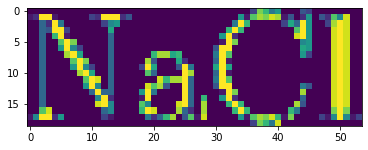

In [30]:
plt.imshow(np.asarray(small))

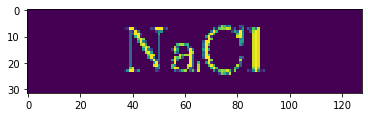

In [31]:
plt.imshow(np.asarray(new_small))

In [35]:
#crop too-big image
delta_w = 128 - big.size[0]
delta_h = 32 - big.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_big = ImageOps.expand(big, padding)

In [72]:
#resize width to 128, then crop
new_size = tuple([128, big.size[1]])
new_big1 = big.resize(new_size, Image.ANTIALIAS)

delta_w = 0
delta_h = 32 - new_big1.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_big1 = ImageOps.expand(new_big1, padding)
new_big1.size


(128, 32)

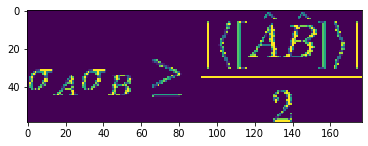

In [37]:
plt.imshow(np.asarray(big))

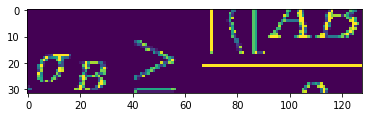

In [38]:
plt.imshow(np.asarray(new_big))

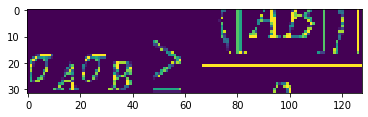

In [73]:
plt.imshow(np.asarray(new_big1))

(551, 28)


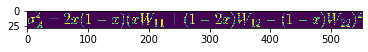

In [86]:
#test = Image.open("../data/test_images/56_biology_3869.png")
test = Image.open("../data/test_images/1351_biology_16249.png")
print(test.size)
plt.imshow(np.asarray(test))

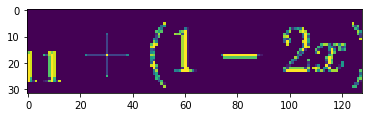

In [87]:
#crop too-big image
delta_w = 128 - test.size[0]
delta_h = 32 - test.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_test = ImageOps.expand(test, padding)
plt.imshow(np.asarray(new_test))

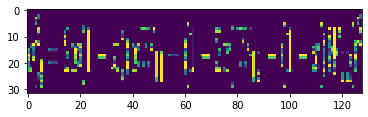

In [89]:
#resize width to 128, then crop
new_size = tuple([128, test.size[1]])
new_test1 = test.resize(new_size, Image.ANTIALIAS)
delta_w = 0
delta_h = 32 - new_test1.size[1]
padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
new_test1 = ImageOps.expand(new_test1, padding)
plt.imshow(np.asarray(new_test1))